In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from joblib import dump,load
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/mordred_1586_all.csv')
df

,PCE_max(%),ABC_acceptor,ABCGG_acceptor,nAcid_acceptor,nBase_acceptor,SpAbs_A_acceptor,SpMax_A_acceptor,SpDiam_A_acceptor,SpAD_A_acceptor,SpMAD_A_acceptor,...,SRW10_donor,TSRW10_donor,MW_donor,AMW_donor,WPath_donor,WPol_donor,Zagreb1_donor,Zagreb2_donor,mZagreb1_donor,mZagreb2_donor
0,6.93,58.097941,40.410316,0,0,99.467327,2.631228,5.073304,99.467327,1.326231,...,10.866528,108.616580,786.328023,7.084036,11282,86,268,321,18.000000,12.027778
1,3.09,58.097941,40.410316,0,0,99.467327,2.631228,5.073304,99.467327,1.326231,...,10.866528,108.616580,786.328023,7.084036,11282,86,268,321,18.000000,12.027778
2,8.33,82.274821,52.682889,0,0,139.585627,2.769425,5.342543,139.585627,1.342169,...,11.281636,136.985730,1131.510776,7.071942,32662,125,408,489,23.138889,17.388889
3,8.67,68.678783,46.494859,0,0,115.449721,2.708776,5.190384,115.449721,1.311929,...,11.450720,154.380658,1390.512098,7.475871,56543,151,492,584,25.611111,21.222222
4,8.46,82.274821,52.682889,0,0,139.585627,2.769425,5.342543,139.585627,1.342169,...,11.123093,120.909423,986.235691,8.018176,17497,106,332,403,21.166667,13.972222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,18.16,101.000010,67.229851,0,0,170.115355,2.746929,5.323745,170.115355,1.308580,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1582,10.70,79.948567,55.806323,0,0,134.270366,2.749301,5.245009,134.270366,1.303596,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1583,17.31,82.375644,57.591622,0,0,137.065638,2.752945,5.249094,137.065638,1.293072,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889
1584,17.81,95.504916,63.384238,0,0,161.382940,2.742219,5.296299,161.382940,1.301475,...,11.449165,143.195696,1248.404856,7.612225,36168,144,446,545,26.555556,18.388889


In [3]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
Y

0        6.93
1        3.09
2        8.33
3        8.67
4        8.46
        ...  
1581    18.16
1582    10.70
1583    17.31
1584    17.81
1585    18.77
Name: PCE_max(%), Length: 1586, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [11]:
##gridsearch and cv select model##
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # 隐藏层神经元数量和层数的组合
    'activation': ['relu', 'tanh'],  # 激活函数选项
    'solver': ['adam', 'sgd'],  # 优化器选项
    'alpha': [0.0001, 0.001, 0.01],  # 正则化参数选项
    'learning_rate': ['constant', 'adaptive']  # 学习率策略选项
}

In [9]:
ann = MLPRegressor(random_state=10)
model = GridSearchCV(estimator =ann,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv=5, verbose=3,n_jobs =-1,return_train_score=True)
model.fit(X_train_stand, y_train)
print(model.cv_results_)
dfresult=pd.DataFrame(model.cv_results_)
dfresult.to_csv('ANN_MORDRED.csv')
print(dfresult)
print(model.best_params_)
print(model.scorer_)
print(model.best_score_)
bestmodel=model.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'mean_fit_time': array([ 25.24722466,  50.63647213,  34.11774192,  53.05002508,
        36.09825969,  86.21801429,  33.54027014,  88.73093047,
        39.08611012,  51.22770939,  37.69441214,  55.95818462,
        44.9456346 ,  61.61514611,  41.81357493, 113.8834981 ,
        28.8227356 ,  52.72520509,  25.34318523,  72.6309104 ,
        39.06292896,  63.49572792,  33.66198473, 110.69852939,
        43.4304565 ,  33.9577035 ,  32.17523065,  67.3226603 ,
        46.04140153,  88.87515569,  56.28384676, 101.08238707,
        28.04537959,  43.29230046,  33.93294802,  53.54934831,
        27.85999131,  62.03771067,  31.26195674,  93.46917453,
        38.2421874 ,  53.54233561,  37.70614357,  55.17544327,
        53.94991579,  71.55977206,  47.42885017, 106.72077837,
        70.40204973,  62.8186008 ,  71.10836477,  63.82493067,
        94.77149181,  97.16075583, 114.1736053 ,  98.65933785,
        44.68288994,  39.64329462,  39

In [12]:
def embedding_plot(embedding, values, label, alpha=1.0, show=True):
    f = plt.figure(figsize=(3,3),dpi=2048)
    plt.scatter(embedding[:,0],
               embedding[:,1],
               s=10,
               c=values,
               linewidth=0, alpha=alpha, cmap=shap.plots.colors.red_blue)
    cb = plt.colorbar(label=label, aspect=40, orientation="horizontal")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_label_position('top')
    plt.gca().axis("off")
    if show:
        plt.show()

In [13]:
ann_regressor=bestmodel

In [15]:
##best select model##




#ann_regressor = MLPRegressor(activation='tanh',
                           #  alpha=0.01,
                           #  hidden_layer_sizes=(100,),
                           #  learning_rate='constant',
                           #  solver='sgd',
                          #   random_state=10)
#
#model = ann_regressor

In [14]:
####fit and predict###
ann_regressor.fit(X_train_stand, y_train)
y_train_hat = ann_regressor.predict(X_train_stand)
y_test_hat = ann_regressor.predict(X_test_stand)

In [9]:
####fit and predict###
ann_regressor.fit(X_train, y_train)
y_train_hat = ann_regressor.predict(X_train)
y_test_hat = ann_regressor.predict(X_test)

E:\Anaconda\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


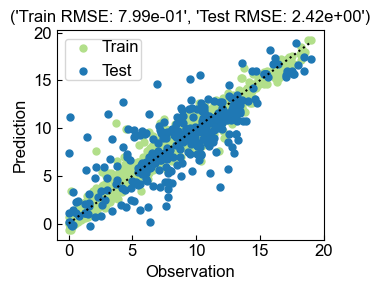

In [15]:


###plot#####
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
#plt.xticks([0, 0.6, 1.2, 1.8])
# plt.yticks([0, 0.6, 1.2, 1.8])
plt.tick_params(direction='in')
#plt.text(450,80,'Scaled',family="Arial",fontsize=fontsize)
#plt.xlim([0,2]) 
#plt.ylim([0,2])
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()

In [16]:
import pickle
with open('model/PaDEL_ANN_1586.pkl', 'wb') as f:
    pickle.dump(ann_regressor, f)